 - Up to this point: All mvp code done, just need to clean up build_mlp to parameterize network topography

### May 16

 - build_mlp properly supports topography parameterization now
 - ran the experiments for cartpole; documente in next code block
 
b527f8d275efc4e2cf334902529262af13e2374b

In [ ]:
python train_pg.py CartPole-v0 -n 100 -b 1000 -e 5 -dna --exp_name sb_no_rtg_dna --n_layers 1 --size 32
python train_pg.py CartPole-v0 -n 100 -b 1000 -e 5 -rtg -dna --exp_name sb_rtg_dna --n_layers 1 --size 32
python train_pg.py CartPole-v0 -n 100 -b 1000 -e 5 -rtg --exp_name sb_rtg_na --n_layers 1 --size 32
python train_pg.py CartPole-v0 -n 100 -b 5000 -e 5 -dna --exp_name lb_no_rtg_dna --n_layers 1 --size 32
python train_pg.py CartPole-v0 -n 100 -b 5000 -e 5 -rtg -dna --exp_name lb_rtg_dna --n_layers 1 --size 32
python train_pg.py CartPole-v0 -n 100 -b 5000 -e 5 -rtg --exp_name lb_rtg_na --n_layers 1 --size 32

#### Large Batch Experiments
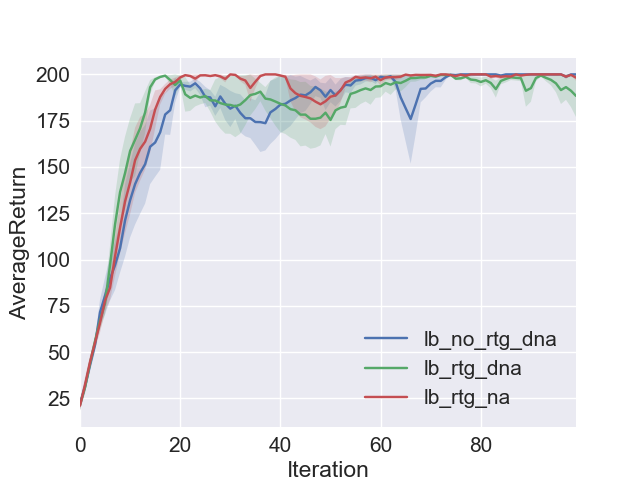

lb_no_rtg_dna_CartPole-v0_16-05-2018_18-45-19
lb_rtg_dna_CartPole-v0_16-05-2018_18-55-35
lb_rtg_na_CartPole-v0_16-05-2018_19-05-04

#### Small Batch Experiments
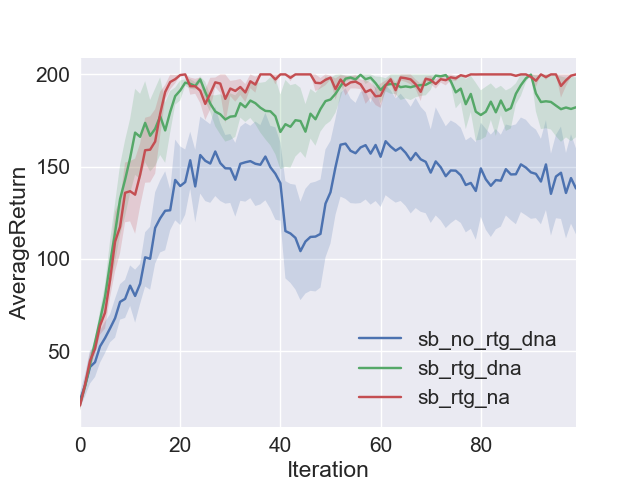

sb_no_rtg_dna_CartPole-v0_16-05-2018_18-38-35
sb_rtg_dna_CartPole-v0_16-05-2018_18-40-49
sb_rtg_na_CartPole-v0_16-05-2018_18-43-02

 - In both small and large batches, the order of performance is:
     1. Reward to go + Normalize advantage
     2. Reward to go
     3. Neither
     
 - Large batch allows (2) and (3) to get closer to (1)'s performance as (1) is saturated by CartPole's successful exit of return = 200.
 
 - What exactly are the pros of advantage normalization?
     1. Subtracts advantage by constant baseline (avg of advantages)
         - This is good, but could be better as noted in lectures to further minimize variance. Can be derived through the definition of variance
     2. Rescales learning rate by 1/$\sigma$
         - It's not clear how this helps? Learning rate slows when stdev of return is high? Shouldn't we try to make the learning rate bigger when stdev is high, as that denotes a lack of convergence?

# Experiment 2: Scale advantage (learning rate) with $\sigma$ instead of $1/\sigma$

In [ ]:
python train_pg.py CartPole-v0 -n 100 -b 1000 -e 5 -dna --exp_name sb_no_rtg_dna_scale_std --n_layers 1 --size 32
python train_pg.py CartPole-v0 -n 100 -b 1000 -e 5 -rtg -dna --exp_name sb_rtg_dna_scale_std --n_layers 1 --size 32
python train_pg.py CartPole-v0 -n 100 -b 1000 -e 5 -rtg --exp_name sb_rtg_na_scale_std --n_layers 1 --size 32
python train_pg.py CartPole-v0 -n 100 -b 5000 -e 5 -dna --exp_name lb_no_rtg_dna_scale_std --n_layers 1 --size 32
python train_pg.py CartPole-v0 -n 100 -b 5000 -e 5 -rtg -dna --exp_name lb_rtg_dna_scale_std --n_layers 1 --size 32
python train_pg.py CartPole-v0 -n 100 -b 5000 -e 5 -rtg --exp_name lb_rtg_na_scale_std --n_layers 1 --size 32

954e098ae05b9df68d3009f43b83fecefedc2a10

#### Large Batch Experiments
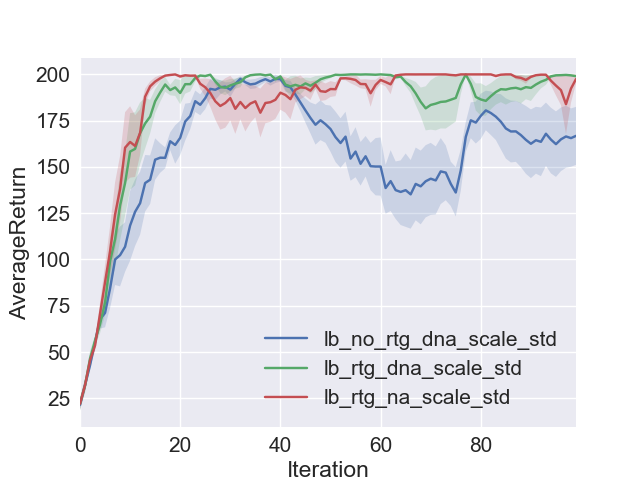
lb_no_rtg_dna_scale_std_CartPole-v0_17-05-2018_16-43-16
lb_rtg_dna_scale_std_CartPole-v0_17-05-2018_16-53-23
lb_rtg_na_scale_std_CartPole-v0_17-05-2018_17-03-34


#### Small Batch Experiments
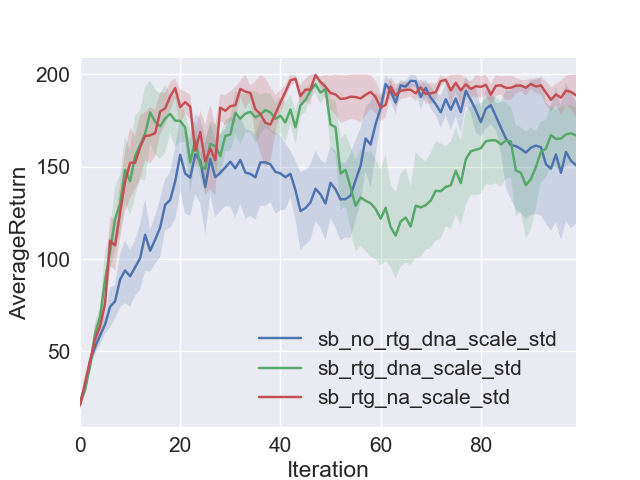
sb_no_rtg_dna_scale_std_CartPole-v0_17-05-2018_16-36-45
sb_rtg_dna_scale_std_CartPole-v0_17-05-2018_16-38-51
sb_rtg_na_scale_std_CartPole-v0_17-05-2018_16-40-56

 - It looks like multiplying by $\sigma$ instead of dividing makes the performance worse. Digging in further, I guess the normalization is just to standardize the returns s.t. the gradients are not affected crazy return values. Karpathy's explaination:
> More general advantage functions. I also promised a bit more discussion of the returns. So far we have judged the goodness of every individual action based on whether or not we win the game. In a more general RL setting we would receive some reward rt at every time step. One common choice is to use a discounted reward, so the “eventual reward” in the diagram above would become Rt=∑∞k=0γkrt+k, where γ is a number between 0 and 1 called a discount factor (e.g. 0.99). The expression states that the strength with which we encourage a sampled action is the weighted sum of all rewards afterwards, but later rewards are exponentially less important. In practice it can can also be important to normalize these. For example, suppose we compute Rt for all of the 20,000 actions in the batch of 100 Pong game rollouts above. One good idea is to “standardize” these returns (e.g. subtract mean, divide by standard deviation) before we plug them into backprop. This way we’re always encouraging and discouraging roughly half of the performed actions. Mathematically you can also interpret these tricks as a way of controlling the variance of the policy gradient estimator. A more in-depth exploration can be found here.
>
> https://datascience.stackexchange.com/questions/20098/why-do-we-normalize-the-discounted-rewards-when-doing-policy-gradient-reinforcem



# Answers to section 4.2.1

1. Reward-to-go was much better than trajectory based gradient estimator
2. Advantage normalization made the network converge faster
3. Testing advantage normalization and why it works explained above
4. Batch size helped mostly for the "no reward-to-go" experiment, but it made iterations much slower. Effects not really seen on the experiments with "reward-to-go"
5. 